In [20]:
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from numpy import newaxis
from keras import losses
from tensorflow import set_random_seed

import keras
import math

random.seed(7)
np.random.seed(7)
set_random_seed(7)

In [21]:
def importData(path):
    data = []
    with open(path, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            if 'S&P 500' not in row:
                data.append(float(row[1]))
    return data

def shift(l):
    for i in range(l.shape[0]-1):
        l[i,:] = l[i+1,:]
    return l

def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)

def preprocessData(sc, data, sequence):
    data = np.array(data).reshape(-1, 1)
    data = sc.fit_transform(data)

    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    train = data[0:train_size,:]
    test = data[train_size:len(data),:]  

    X_train, y_train = new_dataset(train, sequence)
    X_test, y_test = new_dataset(test, sequence)
    
    X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], sequence, 1)))
    X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], sequence, 1)))
    
    return X_train, y_train , X_test, y_test

def preprocessData_test(sc, data, sequence):
    data = np.array(data).reshape(-1, 1)
    data = sc.fit_transform(data)
    X_train , y_train= new_dataset(data, sequence)
    X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], sequence, 1)))
    
    return X_train, y_train

In [29]:
data = importData("data10.csv")
sequence = 5

sc = MinMaxScaler(feature_range=(0, 1))

X_train, y_train, X_test, y_test = preprocessData(sc, data, sequence)

In [23]:
model = load_model("Test3216-B5-LB5.h5")

In [30]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = sc.inverse_transform(trainPredict)
trainY = sc.inverse_transform([y_train])
testPredict = sc.inverse_transform(testPredict)
testY = sc.inverse_transform([y_test])

# trainPredict = shift(trainPredict)
# testPredict = shift(testPredict)

trainError = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testError = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print('Train Error: %.2f RMSE' % (trainError))
print('Test Error: %.2f RMSE' % (testError))
print("----------------------------------------")
print('Train Accuracy: %.2f RMSE' % (100-trainError))
print('Test Accuracy: %.2f RMSE' % (100-testError))

Train Error: 18.66 RMSE
Test Error: 18.99 RMSE
----------------------------------------
Train Accuracy: 81.34 RMSE
Test Accuracy: 81.01 RMSE


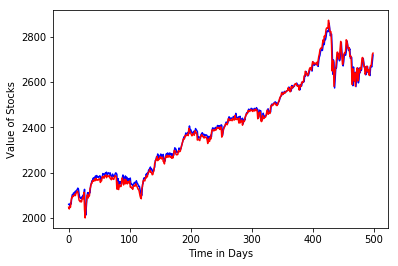

In [31]:
testY = np.array(testY).reshape(-1, 1)

plt.plot(testPredict, 'b', label = 'Predicted Price')
plt.plot(testY, 'r', label = 'Actual Price')
plt.xlabel('Time in Days')
plt.ylabel('Value of Stocks')
plt.show()

In [28]:
data = importData("data10.csv")

arr = data[-1*sequence -2:]
for i in range(9):
    datax, datay = preprocessData_test(sc,arr,sequence)
    testPredict2 = model.predict(datax)
    testPredict2 = sc.inverse_transform(testPredict2)
    arr.append(testPredict2[-1:,0][0])

print(arr[sequence + 5:])

[2725.5771, 2727.4065, 2720.0168, 2725.5864, 2727.6638]


In [12]:
[2725.5771, 2727.4065, 2720.0168, 2725.5864, 2727.6638] # Net3216-B5-LB5
[2726.1902, 2731.658, 2720.4673, 2723.47, 2729.935] # Net3216-B512-LB10

[2721.3608, 2725.552, 2738.2537, 2724.172, 2723.2993]